In [1]:
# Exploring the Galaxy Halo connection of a MW-M31 merger remanent.
# Checking the stellar mass to halo mass relation of the MW-M31 merger remanent.
# The code will calculate the SHMR using the Moster et al. (2013) relation.

In [1]:
# import the needed stuff
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import astropy.units as u
from astropy.constants import G
from ReadFile import Read
from CenterOfMass2 import CenterOfMass
from matplotlib.colors import LogNorm
import scipy.optimize as so
from IPython.display import HTML
from matplotlib.animation import FFMpegWriter
import os
from matplotlib.lines import Line2D
import matplotlib.animation as animation
import glob
from moster import AbundanceMatching


In [2]:
# Made in homework 6.
MW = np.genfromtxt("Orbit_MW.txt", comments='#', names=True)
M31 = np.genfromtxt("Orbit_M31.txt", comments='#', names=True)
M33 = np.genfromtxt("Orbit_M33.txt", comments='#', names=True)

## Plotting the density plot of the halo and disk particles at the above snapshot time


In [3]:
# Code for plotting contours
# from https://gist.github.com/adrn/3993992


def find_confidence_interval(x, pdf, confidence_level):
    return pdf[pdf > x].sum() - confidence_level

def density_contour(xdata, ydata, nbins_x, nbins_y, ax=None, **contour_kwargs):
    """ Create a density contour plot.
    Parameters
    ----------
    xdata : numpy.ndarray
    ydata : numpy.ndarray
    nbins_x : int
        Number of bins along x dimension
    nbins_y : int
        Number of bins along y dimension
    ax : matplotlib.Axes (optional)
        If supplied, plot the contour to this axis. Otherwise, open a new figure
    contour_kwargs : dict
        kwargs to be passed to pyplot.contour()
        
    Example Usage
    -------------
     density_contour(x pos, y pos, contour res, contour res, axis, colors for contours)
     e.g.:
     density_contour(xD, yD, 80, 80, ax=ax, 
         colors=['red','orange', 'yellow', 'orange', 'yellow'])

    """

    H, xedges, yedges = np.histogram2d(xdata, ydata, bins=(nbins_x,nbins_y), density=True)
    # NOTE : if you are using the latest version of python, in the above: 
    # instead of normed=True, use density=True
    
    x_bin_sizes = (xedges[1:] - xedges[:-1]).reshape((1,nbins_x))
    y_bin_sizes = (yedges[1:] - yedges[:-1]).reshape((nbins_y,1))

    pdf = (H*(x_bin_sizes*y_bin_sizes))
    
    X, Y = 0.5*(xedges[1:]+xedges[:-1]), 0.5*(yedges[1:]+yedges[:-1])
    Z = pdf.T
    fmt = {}
    
    ### Adjust Here #### 
    
    # Contour Levels Definitions
    #one_sigma = so.brentq(find_confidence_interval, 0., 1., args=(pdf, 0.68))
    two_sigma = so.brentq(find_confidence_interval, 0., 1., args=(pdf, 0.80))
    #three_sigma = so.brentq(find_confidence_interval, 0., 1., args=(pdf, 0.95))
    #four_sigma = so.brentq(find_confidence_interval, 0., 1., args=(pdf, 0.97))
    #five_sigma = so.brentq(find_confidence_interval, 0., 1., args=(pdf, 0.98))


    #print(four_sigma)

    # Array of Contour levels. Adjust according to the above
    levels = [two_sigma]#, three_sigma, four_sigma, five_sigma][::-1] #[one_sigma,
    
    # contour level labels  Adjust accoding to the above.
    strs =['0.80'][::-1] #['0.68','0.80', ,'0.95', '0.97','0.98'

    
    ###### 
    
    if ax == None:
        contour = plt.contour(X, Y, Z, levels=levels, origin="lower", **contour_kwargs)
        for l, s in zip(contour.levels, strs):
            fmt[l] = s
        plt.clabel(contour, contour.levels, inline=True, fmt=fmt, fontsize=12)

    else:
        contour = ax.contour(X, Y, Z, levels=levels, origin="lower", **contour_kwargs)
        for l, s in zip(contour.levels, strs):
            fmt[l] = s
        ax.clabel(contour, contour.levels, inline=True, fmt=fmt, fontsize=12)
    
    return contour

In [4]:
#Only run it once! This code makes the merged file, with the M31 entry first, and the MW entry second.
# Paths for the files
M31_files = sorted(glob.glob("/Users/swapnaneeldey/Desktop/ASTR400Bfiles/M31/M31_*.txt"))
MW_files = sorted(glob.glob("/Users/swapnaneeldey/Desktop/ASTR400Bfiles/MW/MW_*.txt"))
output_path = "/Users/swapnaneeldey/Desktop/ASTR400Bfiles/MW_M31_NEW/"
# Ensure both lists are of the same length
"""if len(M31_files) != len(MW_files):
    print("Error: M31 and MW file counts do not match.")
else:
    for m31_file, mw_file in zip(M31_files, MW_files):
        output_filename = os.path.basename(m31_file).replace("M31", "Merged")
        output_file = os.path.join(output_path, output_filename)  # Creating an output filename
    
        with open(m31_file, 'r') as m31, open(mw_file, 'r') as mw, open(output_file, 'w') as out:
            out.writelines(m31.readlines())  # Write full M31 file
            mw_lines = mw.readlines()[4:]   # Skip first three lines of MW file
            out.writelines(mw_lines)        # Append remaining MW lines

        print(f"Merged {m31_file} and {mw_file} -> {output_file}")"""


'if len(M31_files) != len(MW_files):\n    print("Error: M31 and MW file counts do not match.")\nelse:\n    for m31_file, mw_file in zip(M31_files, MW_files):\n        output_filename = os.path.basename(m31_file).replace("M31", "Merged")\n        output_file = os.path.join(output_path, output_filename)  # Creating an output filename\n    \n        with open(m31_file, \'r\') as m31, open(mw_file, \'r\') as mw, open(output_file, \'w\') as out:\n            out.writelines(m31.readlines())  # Write full M31 file\n            mw_lines = mw.readlines()[4:]   # Skip first three lines of MW file\n            out.writelines(mw_lines)        # Append remaining MW lines\n\n        print(f"Merged {m31_file} and {mw_file} -> {output_file}")'

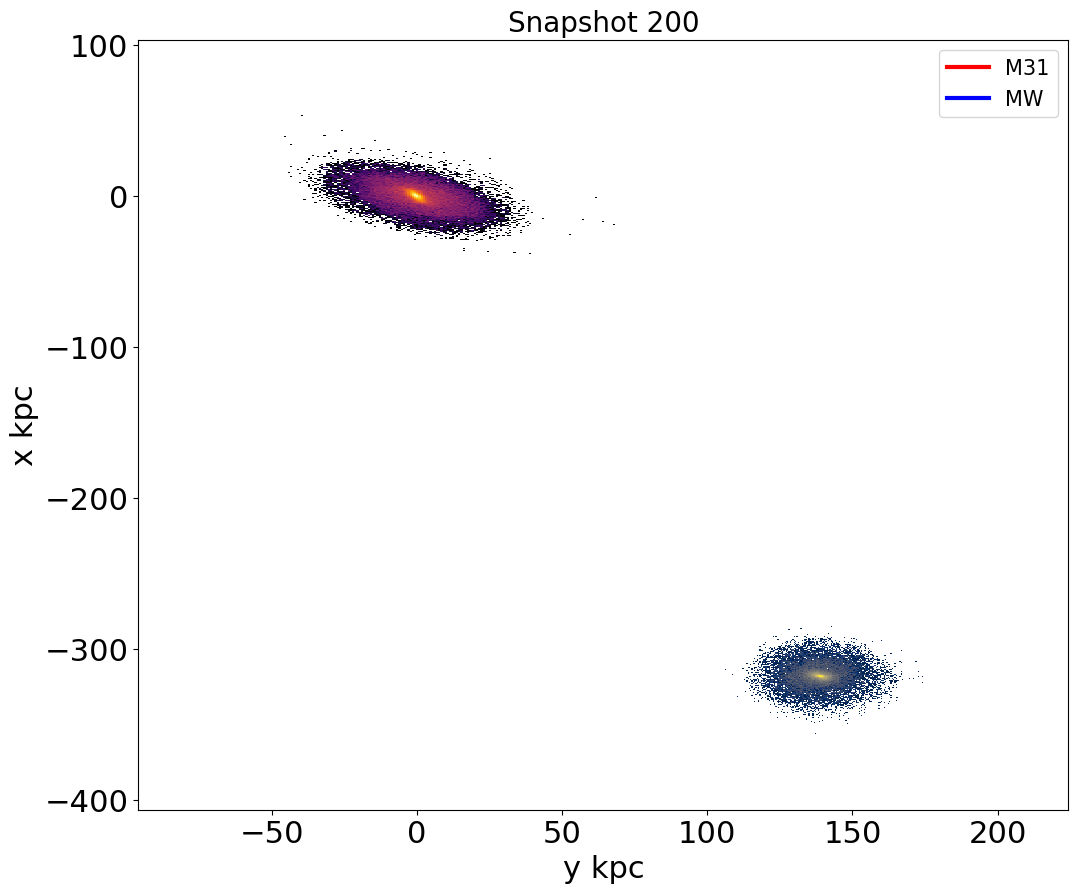

In [ ]:

snapshot_number = np.arange(200, 800, 10)

fig, ax = plt.subplots(figsize=(12, 10))
cbar = None

# Function to update the plot for each snapshot
def update(frame):
    global cbar
    ax.clear()
    snap = snapshot_number[frame]
    # Load data for M31 and MW
    COMD_Merge = CenterOfMass(f"/Users/swapnaneeldey/Desktop/ASTR400Bfiles/MW_M31_NEW/Merged_{snap}.txt", 2)
    COMP_Merge = COMD_Merge.COM_P(0.1, 2)
    #xD_Merger = COMD_Merge.x - COMP_Merge[0].value
    #yD_Merger = COMD_Merge.y - COMP_Merge[1].value
    
    # Load data for M31 and MW
    COMD_M31 = CenterOfMass(f"/Users/swapnaneeldey/Desktop/ASTR400Bfiles/M31/M31_{snap}.txt", 2)
    COMP_M31 = COMD_M31.COM_P(0.1, 2)
    xD_M31 = COMD_M31.x - COMP_Merge[0].value
    yD_M31 = COMD_M31.y - COMP_Merge[1].value
    
    COMD_MW = CenterOfMass(f"/Users/swapnaneeldey/Desktop/ASTR400Bfiles/MW/MW_{snap}.txt", 2)
    COMP_MW = COMD_MW.COM_P(0.1, 2)
    xD_MW = COMD_MW.x - COMP_Merge[0].value
    yD_MW = COMD_MW.y - COMP_Merge[1].value

    # Plot 2D histograms
    hist1 = ax.hist2d(xD_M31, yD_M31, bins=150, norm=LogNorm(), cmap='inferno', label ='M31')
    hist2 = ax.hist2d(xD_MW, yD_MW, bins=150, norm=LogNorm(), cmap='cividis', label ='MW')
    #hist2 = ax.hist2d(xD_Merger, yD_Merger, bins=150, norm=LogNorm(), cmap='cividis')
    # Update colorbar
    """if cbar:
        cbar.remove()
    cbar = fig.colorbar(hist1[3], ax=ax)
    cbar.set_label("Number of disk particles per bin", fontsize=15)"""
    legend_elements = [Line2D([0], [0], color='red', lw=3, label='M31'),
                       Line2D([0], [0], color='blue', lw=3, label='MW')]
    ax.legend(handles=legend_elements, loc='upper right', fontsize=15)
    
    ax.set_xlabel("y kpc", fontsize=22)
    ax.set_ylabel("x kpc", fontsize=22)
    # Calculate the min and max for the x and y axes to auto-zoom
    all_x = np.concatenate([xD_M31, xD_MW])
    all_y = np.concatenate([yD_M31, yD_MW])
    
    # Determine the zoom level (min and max limits) for both x and y axes
    margin = 50  # Add a small margin around the data
    ax.set_xlim(np.min(all_x) - margin, np.max(all_x) + margin)
    ax.set_ylim(np.min(all_y) - margin, np.max(all_y) + margin)
    ax.set_title(f"Snapshot {snap}", fontsize=20)
    #ax.legend(loc='upper right', fontsize=15)
    # Adjust tick label size
    label_size = 22
    matplotlib.rcParams['xtick.labelsize'] = label_size 
    matplotlib.rcParams['ytick.labelsize'] = label_size

ani = animation.FuncAnimation(fig, update, frames=len(snapshot_number), repeat=True)
# Save animation as MP4
# Specify the ffmpeg writer
ani.save("/Users/swapnaneeldey/Desktop/ASTR400Bfiles/ASTR400B/ResearchAssignment/ResearchAssignment5/m31_animation.mp4")

# Display animation in Jupyter Notebook
HTML(ani.to_jshtml())

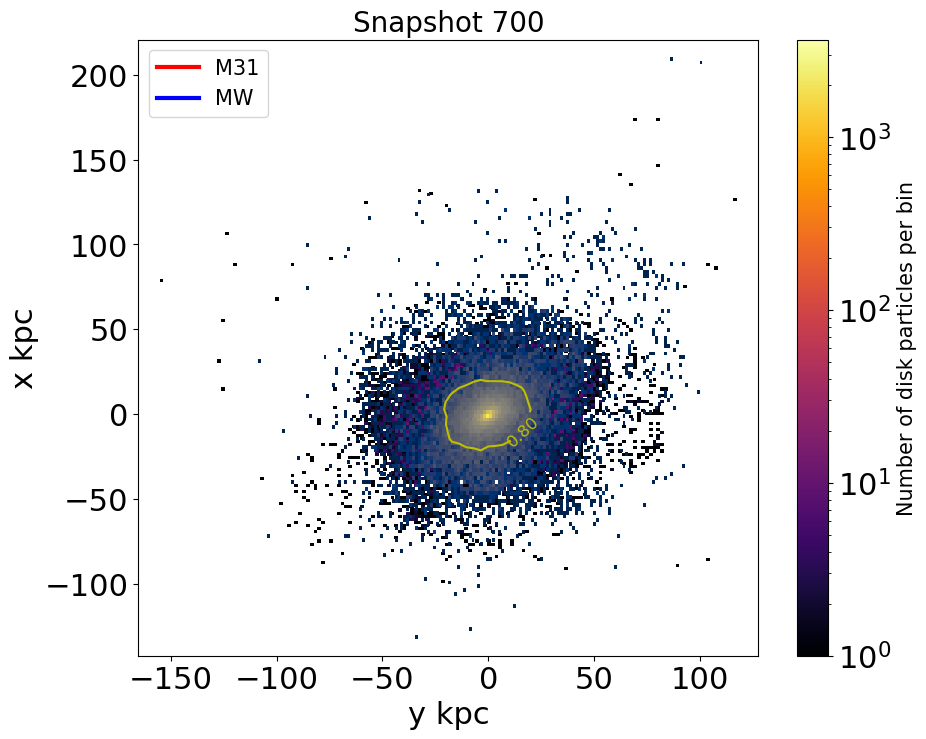

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

snap = 700
# Load data for M31 and MW
COMD_Merge = CenterOfMass(f"/Users/swapnaneeldey/Desktop/ASTR400Bfiles/MW_M31_NEW/Merged_{snap}.txt", 2)
COMP_Merge_p = COMD_Merge.COM_P(0.1, 2)
xD_Merger = COMD_Merge.x - COMP_Merge_p[0].value
yD_Merger = COMD_Merge.y - COMP_Merge_p[1].value
zD_Merger = COMD_Merge.z - COMP_Merge_p[2].value

# Load data for M31 and MW
COMD_M31 = CenterOfMass(f"/Users/swapnaneeldey/Desktop/ASTR400Bfiles/M31/M31_{snap}.txt", 2)
COMP_M31 = COMD_M31.COM_P(0.1, 2)
xD_M31 = COMD_M31.x - COMP_Merge_p[0].value
yD_M31 = COMD_M31.y - COMP_Merge_p[1].value
zD_M31 = COMD_M31.z - COMP_Merge_p[2].value 

COMD_MW = CenterOfMass(f"/Users/swapnaneeldey/Desktop/ASTR400Bfiles/MW/MW_{snap}.txt", 2)
COMP_MW = COMD_MW.COM_P(0.1, 2)
xD_MW = COMD_MW.x - COMP_Merge_p[0].value
yD_MW = COMD_MW.y - COMP_Merge_p[1].value
zD_MW = COMD_MW.z - COMP_Merge_p[2].value

# Plot 2D histograms
hist1 = ax.hist2d(xD_M31, yD_M31, bins=150, norm=LogNorm(), cmap='inferno', label ='M31')
hist2 = ax.hist2d(xD_MW, yD_MW, bins=150, norm=LogNorm(), cmap='cividis', label ='MW')
#hist3 = ax[1].hist2d(xD_Merger, yD_Merger, bins=150, norm=LogNorm(), cmap='cividis')
# Update colorbar
#contour1 = density_contour(xD_MW, yD_MW, 80, 80, ax=ax[0], colors=['g', "r"])
contour2 = density_contour(xD_Merger, yD_Merger, 80, 80, ax=ax, colors=['y', "w"])

cbar = fig.colorbar(hist1[3], ax=ax)
cbar.set_label("Number of disk particles per bin", fontsize=15)
legend_elements = [Line2D([0], [0], color='red', lw=3, label='M31'),
                    Line2D([0], [0], color='blue', lw=3, label='MW')]
ax.legend(handles=legend_elements, loc='upper left', fontsize=15)

ax.set_xlabel("y kpc", fontsize=22)
ax.set_ylabel("x kpc", fontsize=22)
# Calculate the min and max for the x and y axes to auto-zoom
all_x = np.concatenate([xD_M31, xD_MW])
all_y = np.concatenate([yD_M31, yD_MW])

# Determine the zoom level (min and max limits) for both x and y axes
margin = 10  # Add a small margin around the data
ax.set_xlim(np.min(all_x) - margin, np.max(all_x) + margin)
ax.set_ylim(np.min(all_y) - margin, np.max(all_y) + margin)
#ax[1].set_xlim(np.min(all_x) - margin, np.max(all_x) + margin)
#ax[1].set_ylim(np.min(all_y) - margin, np.max(all_y) + margin)
#ax.set_xlim(-20, 20)
#ax.set_ylim(-15, 15)
ax.set_title(f"Snapshot {snap}", fontsize=20)
#ax.legend(loc='upper right', fontsize=15)
# Adjust tick label size
label_size = 22
matplotlib.rcParams['xtick.labelsize'] = label_size 
matplotlib.rcParams['ytick.labelsize'] = label_size
plt.savefig("/Users/swapnaneeldey/Desktop/ASTR400Bfiles/ASTR400B/ResearchAssignment/ResearchAssignment5/700_merge")
plt.show()

In [8]:
np.set_printoptions(precision=10, suppress=False, threshold=10000)


In [9]:
def find_dist_in_contour(xdata, ydata, zdata, nbins_x, nbins_y, sigma_level):
    """
    Find the data points that fall within a specific confidence contour level.
    
    Parameters
    ----------
    xdata : numpy.ndarray
        x-coordinates of data pointsg
    ydata : numpy.ndarray
        y-coordinates of data points
    zdata : numpy.ndarray
        z-values associated with (x, y) points
    nbins_x : int
        Number of bins along x dimension
    nbins_y : int
        Number of bins along y dimension
    sigma_level : str, optional
        The confidence level to use ("one_sigma", "two_sigma", etc.)
        
    Returns
    -------
    numpy.ndarray
        Array of (x, y, z) data points within the specified contour
    """
    # Create the 2D histogram
    H, xedges, yedges = np.histogram2d(xdata, ydata, bins=(nbins_x, nbins_y), density=True)
    
    print("Min H:", np.min(H[H > 0]))
    print("Max H:", np.max(H))
    # Calculate the bin sizes
    x_bin_sizes = (xedges[1:] - xedges[:-1]).reshape((1, nbins_x))
    y_bin_sizes = (yedges[1:] - yedges[:-1]).reshape((nbins_y, 1))
    
    # Calculate the probabilit mass
    pdm = (H * (x_bin_sizes * y_bin_sizes)) #actual probability that a point falls in the bim
    # Get the bin centers
    X, Y = 0.5 * (xedges[1:] + xedges[:-1]), 0.5 * (yedges[1:] + yedges[:-1])
    Z = pdm.T  # Transpose to align with (X, Y)
    # Calculate contour threshold
    threshold = so.brentq(find_confidence_interval, 0., 1., args=(pdm, sigma_level/100))
    # Find all points where PDM is above the threshold (inside the contour)
    in_contour = Z >= threshold
    # Extract the indices of the bins inside the contour
    contour_indices = np.argwhere(in_contour)
    # Convert bin indices to actual (x, y) coordinates
    x_contour = X[contour_indices[:, 1]]  
    y_contour = Y[contour_indices[:, 0]] 
    """# Using the edge width as defined above
    x_range = (xedges[1] - xedges[0]) / 2
    y_range = (yedges[1] - yedges[0]) / 2
    in_contour_mask = np.zeros(len(xdata), dtype=bool)
    # finding what x and y lies within the countour point +/- the edge width
    for i, (x, y) in enumerate(zip(xdata, ydata)):
        in_contour_mask[i] = np.any(
            (x_contour - x_range <= x) & (x <= x_contour + x_range) &
            (y_contour - y_range <= y) & (y <= y_contour + y_range)
        )

    x_points_in_contour = xdata[in_contour_mask]
    y_points_in_contour = ydata[in_contour_mask]"""
    max_dist = np.max(np.sqrt(x_contour**2 + y_contour**2))
    return max_dist


In [10]:
max_dist = find_dist_in_contour(xD_Merger, yD_Merger,zD_Merger, 150, 150, 80)
print(f"Maximum distance value within 2-sigma contour: {max_dist* u.kpc} ") 

Min H: 2.4663885986720463e-06
Max H: 0.0244739740646234
Maximum distance value within 2-sigma contour: 23.206858744423506 kpc 


## We use the radius from above to make a shphere from the center of merger and  include all the disk+buldge particles within the sphere

In [11]:
# read data in the given file using Read
_, _, data = Read("/Users/swapnaneeldey/Desktop/ASTR400Bfiles/MW_M31_NEW/Merged_700.txt")                                                                                             

#create an array to store indexes of particles of desired Ptype                                
index = np.where((data['type'] == 2) | (data['type'] == 3))
m = data['m'][index]
#positions and velocities
x_merg = data['x'][index] - COMP_Merge_p[0].value #COMP values for disk and buldge are basically the same since the merger has stabilized.
y_merg = data["y"][index] - COMP_Merge_p[1].value
z_merg = data["z"][index] - COMP_Merge_p[2].value

In [12]:
#getting the distances of each particle.
dist_array = x_merg**2 + y_merg**2 + z_merg**2
dist_array = np.sqrt(dist_array)
print(dist_array)
# getting indexes of particles within the max distance
idx_dist_3d = np.where(dist_array <= max_dist)[0]
# x,y ,z position withing the sphere and the position correspond to that in the merged files.
x_3d = x_merg[idx_dist_3d] + COMP_Merge_p[0].value #adding COMP to get the original positions
y_3d = y_merg[idx_dist_3d] + COMP_Merge_p[1].value
z_3d = z_merg[idx_dist_3d] + COMP_Merge_p[2].value

m_3d = m[idx_dist_3d]
x_3d , y_3d, z_3d # position dont hold much value going forward, but mass does.

[10.5695440129  1.5267114626  5.1534618811 ...  0.4470644361 11.3229382423
  1.1316070387]


(array([145.992, 145.865, 143.311, ..., 146.793, 148.508, 147.088]),
 array([64.7408, 53.5483, 53.9756, ..., 54.8131, 55.2738, 55.8407]),
 array([107.094, 110.782, 114.349, ..., 110.138, 121.752, 110.8  ]))

## getting the desired Halo particles

In [13]:
#Now we write code to get the halo points.
# wee need halo points that are within r200.

#getting COM object for the halo particles of the merger.
COMD_Merge_halo = CenterOfMass(f"/Users/swapnaneeldey/Desktop/ASTR400Bfiles/MW_M31_NEW/Merged_{snap}.txt", 1)
COMP_Merge_halo_p = COMD_Merge_halo.COM_P(0.1, 1)

#getting the index of the halo particles
index_halo = np.where(data['type'] == 1)
#mass and position of the halo particles.
m_halo = data['m'][index_halo]
x_halo = data['x'][index_halo] - COMP_Merge_halo_p[0].value
y_halo = data["y"][index_halo] - COMP_Merge_halo_p[1].value
z_halo = data["z"][index_halo] - COMP_Merge_halo_p[2].value
dist_array_halo = x_halo**2 + y_halo**2 + z_halo**2
dist_array_halo = np.sqrt(dist_array_halo)


In [14]:
# store the mass of each particle within the radii
radii = np.sort(dist_array_halo.copy())
particle_mass_enclosed_array = np.zeros(len(radii))
# identify particles that are enclodes within the radii
all_radii = dist_array_halo.copy()
# loop over the radii
for i in range(len(radii)):
    # get the mass of those particles in sol mass
    particle_mass_enclosed_array[i] = np.sum(m_halo[np.where(all_radii < radii[i])]) * 1e10

#getting the density at each radius
density_array = particle_mass_enclosed_array / (4/3 * np.pi * radii**3)

In [15]:
p_c = 8.5 * 10**-27 * u.kg/u.m**3 
p_c = p_c.to(u.Msun / u.kpc**3)
p_c
# halo density limit
h_density_lim = 200*p_c
h_density_lim

<Quantity 25118.5546901876 solMass / kpc3>

p_c.to(u.Msun / u.Mpc**3)  = p_c.to(u.Msun / u.Mpc**3) 

p_c = 3.3*10^11 h^2 M_o Mpc^-3

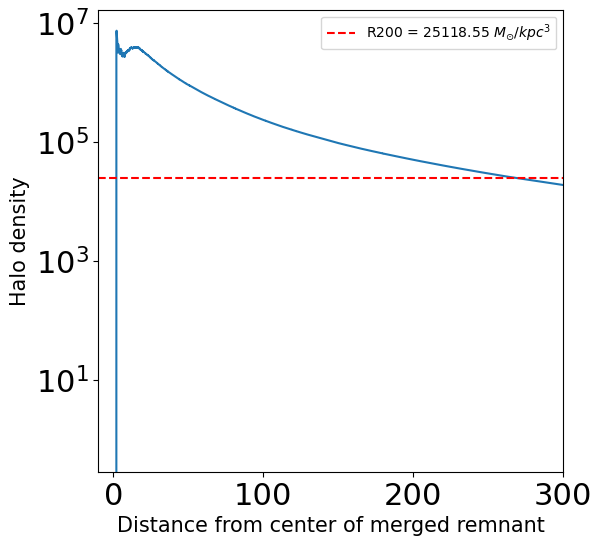

In [16]:
#vizualizing the halo density vs distance from the center of the merged remnant.
fig, ax = plt.subplots(figsize=(6, 6))
ax.plot(radii, density_array)
ax.axhline(h_density_lim.value, color='red', linestyle='--', label= fr'R200 = {h_density_lim.value:.2f} $M_{{\odot}}/kpc^3$')
ax.set_xlabel("Distance from center of merged remnant", fontsize=15)
ax.set_ylabel("Halo density", fontsize=15)
ax.set_xlim(-10, 300)
ax.set_yscale('log')
#ax.set_ylim(1e3, 1e5)
ax.legend()

In [17]:
# finding the Halo density point which is closest to the R200 limit
diff_array = abs(density_array - h_density_lim.value)
# the intercept will have a value of 0.
idx_halo = np.where(diff_array == np.min(diff_array))[0]
desired_halo_rad = radii[idx_halo]
print(f"Desired halo radius: {desired_halo_rad[0]:.2f} kpc")

Desired halo radius: 267.56 kpc


In [18]:
#get all the particles within this radius
idx_halo = np.where(dist_array_halo <= desired_halo_rad)[0]
# x,y ,z position withing the sphere and the position correspond to that in the merged files.
x_halo = x_halo[idx_halo] + COMP_Merge_halo_p[0].value  
y_halo = y_halo[idx_halo] + COMP_Merge_halo_p[1].value  
z_halo = z_halo[idx_halo] + COMP_Merge_halo_p[2].value
m_halo = m_halo[idx_halo]
idx_halo, x_halo , y_halo, z_halo, m_halo   

(array([    0,     1,     2, ..., 49990, 49997, 49998]),
 array([120.569 , 182.578 , 104.63  , ..., 195.359 , 269.908 ,  11.8288]),
 array([-159.543 ,  127.723 ,   17.0828, ...,   23.8413,   30.2379,
         167.901 ]),
 array([ 79.8894,  81.4756, 203.898 , ..., 131.91  ,  67.6767, 244.725 ]),
 array([0.007683523, 0.007683523, 0.007683523, ..., 0.007899703,
        0.007899703, 0.007899703]))

In [25]:
total_stellar_mass = np.sum(m_3d) * 1e10
print(f"Total stellar mass of the merger remnant: {total_stellar_mass:.2e} Msun")

Total stellar mass of the merger remnant: 1.69e+11 Msun


In [29]:
total_halo_mass = np.sum(m_halo) * 1e10
#in scientific notation
print(f"Total stellar mass: {total_stellar_mass:.2e} Msun") 
print(f"Total halo mass: {total_halo_mass:.2e} Msun")

Total stellar mass: 1.69e+11 Msun
Total halo mass: 2.02e+12 Msun


## establishing the moster relation

In [30]:
# Now we can use the Moster et al. (2013) relation to find the expected stellar mass for our calculated halo mass.
MW_M31 = AbundanceMatching(total_halo_mass, 0)
expected_stellar_mass = MW_M31.StellarMass() 
print(f"Expected stellar mass: {expected_stellar_mass:.2e} Msun")
print(f"calculated stellar mass: {total_stellar_mass:.2e} Msun")

Expected stellar mass: 5.01e+10 Msun
calculated stellar mass: 1.69e+11 Msun


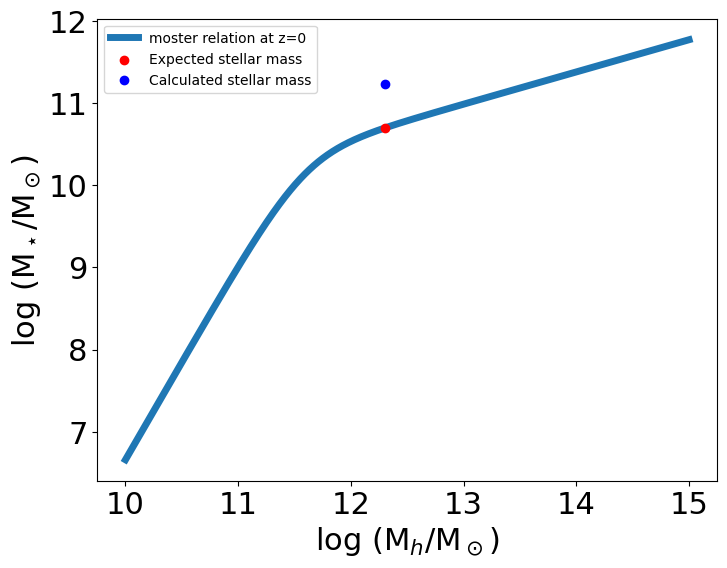

In [42]:
# plotting the moster and the expected and calculated stellar mass
fig, ax = plt.subplots(figsize=(8, 6))
# plot the Moster relation
mh = np.logspace(10, 15, 1000)
# Define Instances of the Class for each redshift
MosterZ0 = AbundanceMatching(mh,0) # z = 0
# Plot z = 0
plt.plot(np.log10(mh), np.log10(MosterZ0.StellarMass()),
         linewidth = 5, label='moster relation at z=0',zorder=1)

# plot the expected stellar mass
plt.scatter(np.log10(total_halo_mass), np.log10(expected_stellar_mass), color='red', label='Expected stellar mass',zorder=2) 
# plot the calculated stellar mass
plt.scatter(np.log10(total_halo_mass), np.log10(total_stellar_mass), color='blue', label='Calculated stellar mass')

plt.xlabel('log (M$_h$/M$_\odot$)',fontsize=22) 
plt.ylabel('log (M$_\star$/M$_\odot$)', fontsize=22)
plt.legend()